# Predict Clicked Ads Customer Classification by using Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Clicked Ads Dataset.csv", index_col=0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [11]:
df_clean = df.dropna(subset=["Daily Time Spent on Site", "Daily Internet Usage"])
df_clean["Clicked on Ad"] = df_clean["Clicked on Ad"].map({"Yes": 1, "No": 0})

In [13]:
df_clean.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,977.000000,977.000000,9.650000e+02,977.000000,977.000000
mean,64.891965,36.025589,3.854850e+08,179.862866,0.502559
std,15.852891,8.788753,9.372679e+07,43.928912,0.500250
min,32.600000,19.000000,9.797550e+07,104.780000,0.000000
25%,50.870000,29.000000,3.293571e+08,138.680000,0.000000
50%,68.100000,35.000000,3.990683e+08,182.650000,1.000000
75%,78.370000,42.000000,4.590324e+08,218.790000,1.000000
max,91.430000,61.000000,5.563936e+08,267.010000,1.000000


In [14]:
df_clean.describe(include=["object"])

,Male,Timestamp,city,province,category
count,974,977,977,977,977
unique,2,974,30,16,10
top,Perempuan,5/20/2016 12:17,Bandung,Daerah Khusus Ibukota Jakarta,Otomotif
freq,507,2,64,247,109


## Task 1

### Univariate Analysis

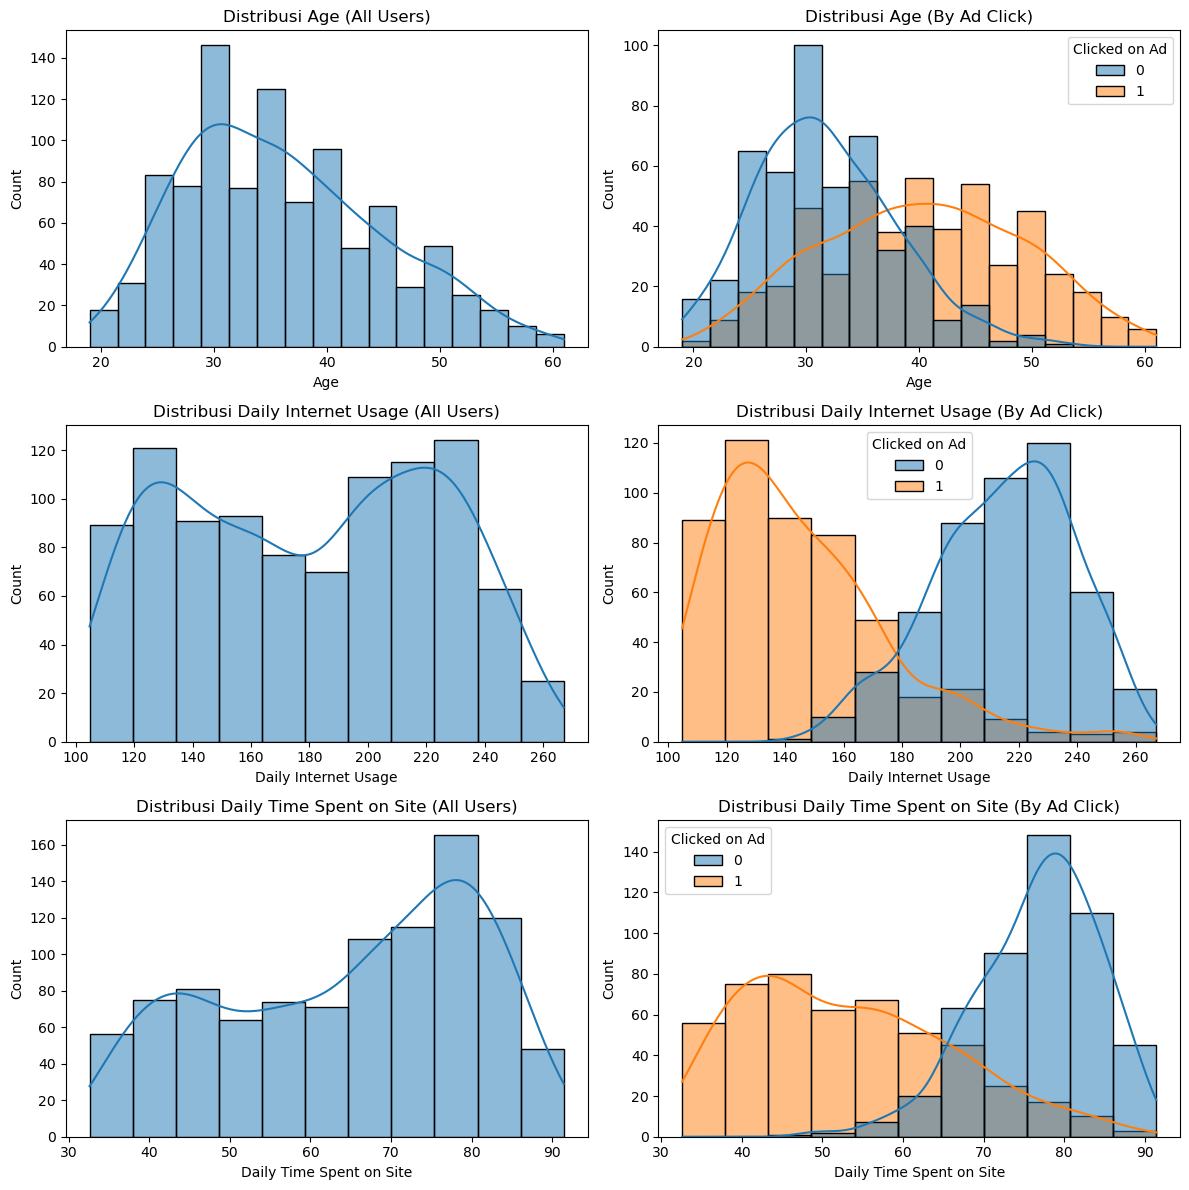

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
cols = ["Age", "Daily Internet Usage", "Daily Time Spent on Site"]

for i, col in enumerate(cols):
    sns.histplot(df_clean[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribusi {col} (All Users)")

    sns.histplot(data=df_clean, x=col, hue="Clicked on Ad", kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribusi {col} (By Ad Click)")

plt.tight_layout()
plt.show()

### Bivariate Analysis

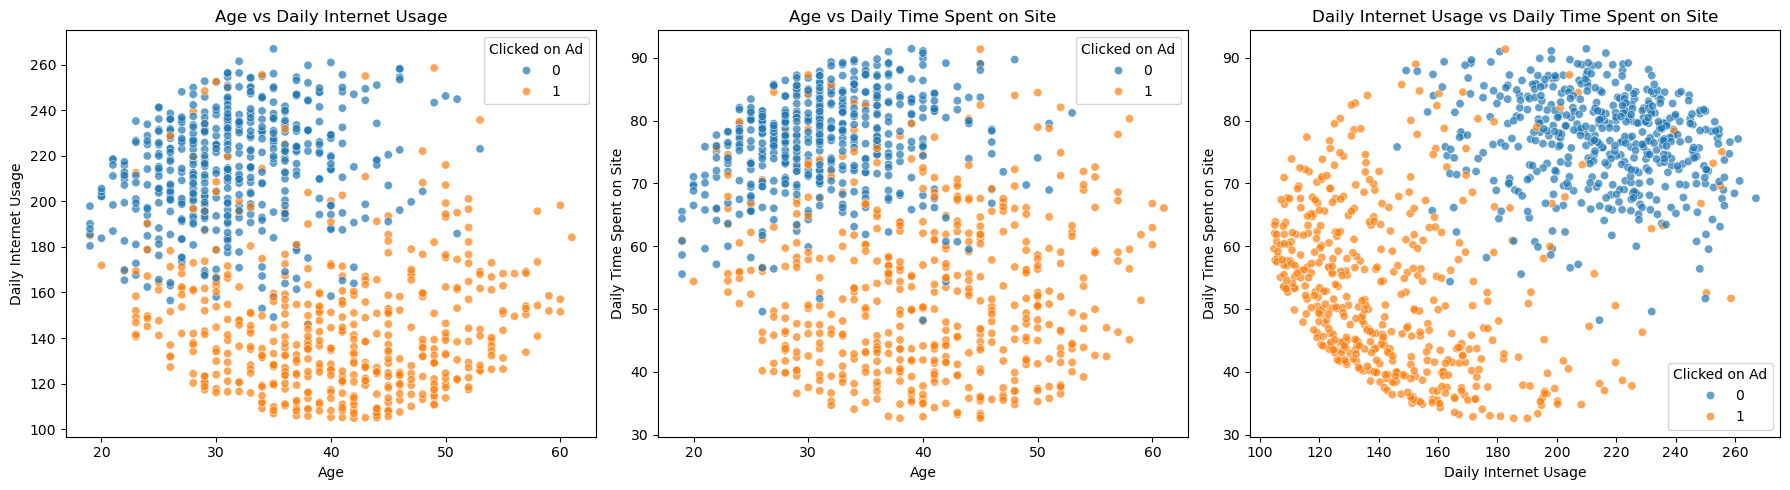

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=df_clean, x="Age", y="Daily Internet Usage", hue="Clicked on Ad", ax=axes[0], alpha=0.7
)
axes[0].set_title("Age vs Daily Internet Usage")

sns.scatterplot(
    data=df_clean, x="Age", y="Daily Time Spent on Site", hue="Clicked on Ad", ax=axes[1], alpha=0.7
)
axes[1].set_title("Age vs Daily Time Spent on Site")

sns.scatterplot(
    data=df_clean, x="Daily Internet Usage", y="Daily Time Spent on Site",
    hue="Clicked on Ad", ax=axes[2], alpha=0.7
)
axes[2].set_title("Daily Internet Usage vs Daily Time Spent on Site")

plt.tight_layout()
plt.show()

### Multivariate Analysis

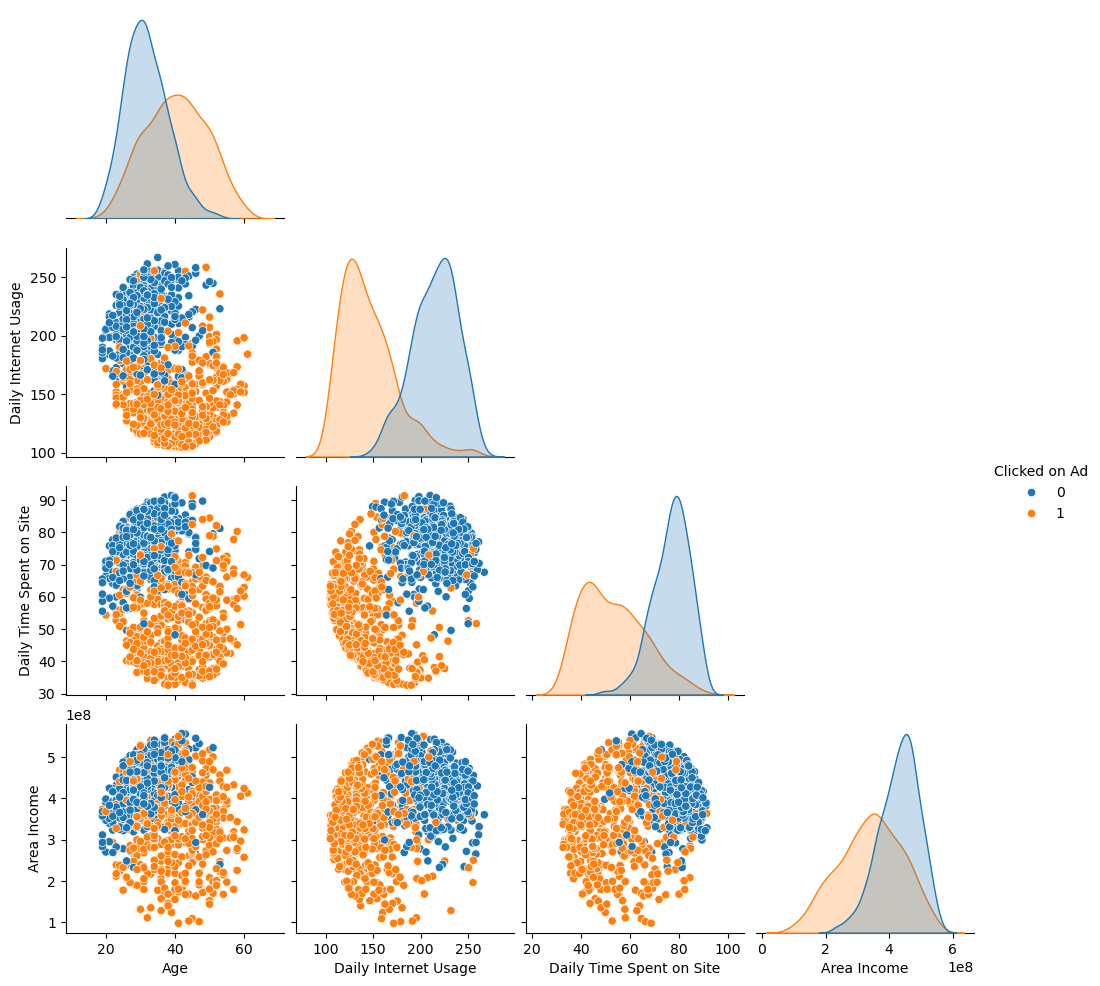

In [17]:
sns.pairplot(
    df_clean[["Age", "Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Clicked on Ad"]],
    hue="Clicked on Ad",
    diag_kind="kde",
    corner=True
)
plt.show()

### Heatmap

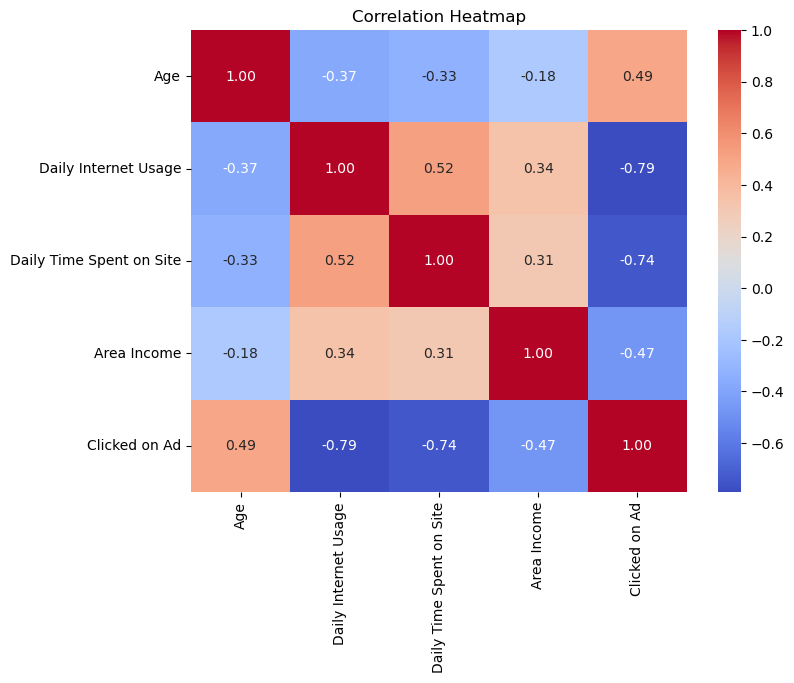

In [18]:
plt.figure(figsize=(8, 6))
corr = df_clean[["Age", "Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Clicked on Ad"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()